<a href="https://colab.research.google.com/github/26Kenn07/Machine-Learning-Projects/blob/main/Disease_Symptoms_and_Patient_Profile_Dataset_Using_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Columns and Usage:**
Disease: The name of the disease or medical condition.

Fever: Indicates whether the patient has a fever (Yes/No).

Cough: Indicates whether the patient has a cough (Yes/No).

Fatigue: Indicates whether the patient experiences fatigue (Yes/No).

Difficulty Breathing: Indicates whether the patient has difficulty breathing (Yes/No).

Age: The age of the patient in years.

Gender: The gender of the patient (Male/Female).

Blood Pressure: The blood pressure level of the patient (Normal/High).

Cholesterol Level: The cholesterol level of the patient (Normal/High).

Outcome Variable: The outcome variable indicating the result of the diagnosis or assessment for the specific disease (Positive/Negative).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [5]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [6]:
df.shape

(349, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [8]:
df['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [9]:
df['Blood Pressure'].unique()

array(['Low', 'Normal', 'High'], dtype=object)

In [10]:
df['Cholesterol Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [11]:
df['Outcome Variable'].unique()

array(['Positive', 'Negative'], dtype=object)

In [12]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [13]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

**Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
LE = LabelEncoder()

In [17]:
df['Fever'] = LE.fit_transform(df['Fever'])

In [18]:
df['Cough'] = LE.fit_transform(df['Cough'])

In [19]:
df['Fatigue'] = LE.fit_transform(df['Fatigue'])

In [20]:
df['Difficulty Breathing'] = LE.fit_transform(df['Difficulty Breathing'])

In [21]:
df['Gender'] = LE.fit_transform(df['Gender'])

In [22]:
df['Blood Pressure'] = LE.fit_transform(df['Blood Pressure'])

In [23]:
df['Cholesterol Level'] = LE.fit_transform(df['Cholesterol Level'])

In [24]:
df['Outcome Variable'] = LE.fit_transform(df['Outcome Variable'])

**Frequency Encoding:**

->Disease column has so many categorical variables so LabelEncoding and 
  OneHotEncoding is not appropriate.
  
->Frequency Encoding will replace catecorical variable with its number of 
  counts in datset.

In [26]:
# Calculate the frequency of each category in the dataset
category_counts = df['Disease'].value_counts()

# Create a new column with the frequency values for each category
df['Disease_freq'] = df['Disease'].map(category_counts)

In [27]:
df = df.drop(columns='Disease',axis=1)

In [28]:
df.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_freq
0,1,0,1,1,19,0,1,2,1,8
1,0,1,1,0,25,0,2,2,0,6
2,0,1,1,0,25,0,2,2,0,6
3,1,1,0,1,25,1,2,2,1,23
4,1,1,0,1,25,1,2,2,1,23


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Fever                 349 non-null    int32
 1   Cough                 349 non-null    int32
 2   Fatigue               349 non-null    int32
 3   Difficulty Breathing  349 non-null    int32
 4   Age                   349 non-null    int64
 5   Gender                349 non-null    int32
 6   Blood Pressure        349 non-null    int32
 7   Cholesterol Level     349 non-null    int32
 8   Outcome Variable      349 non-null    int32
 9   Disease_freq          349 non-null    int64
dtypes: int32(8), int64(2)
memory usage: 16.5 KB


**Data Visualization**

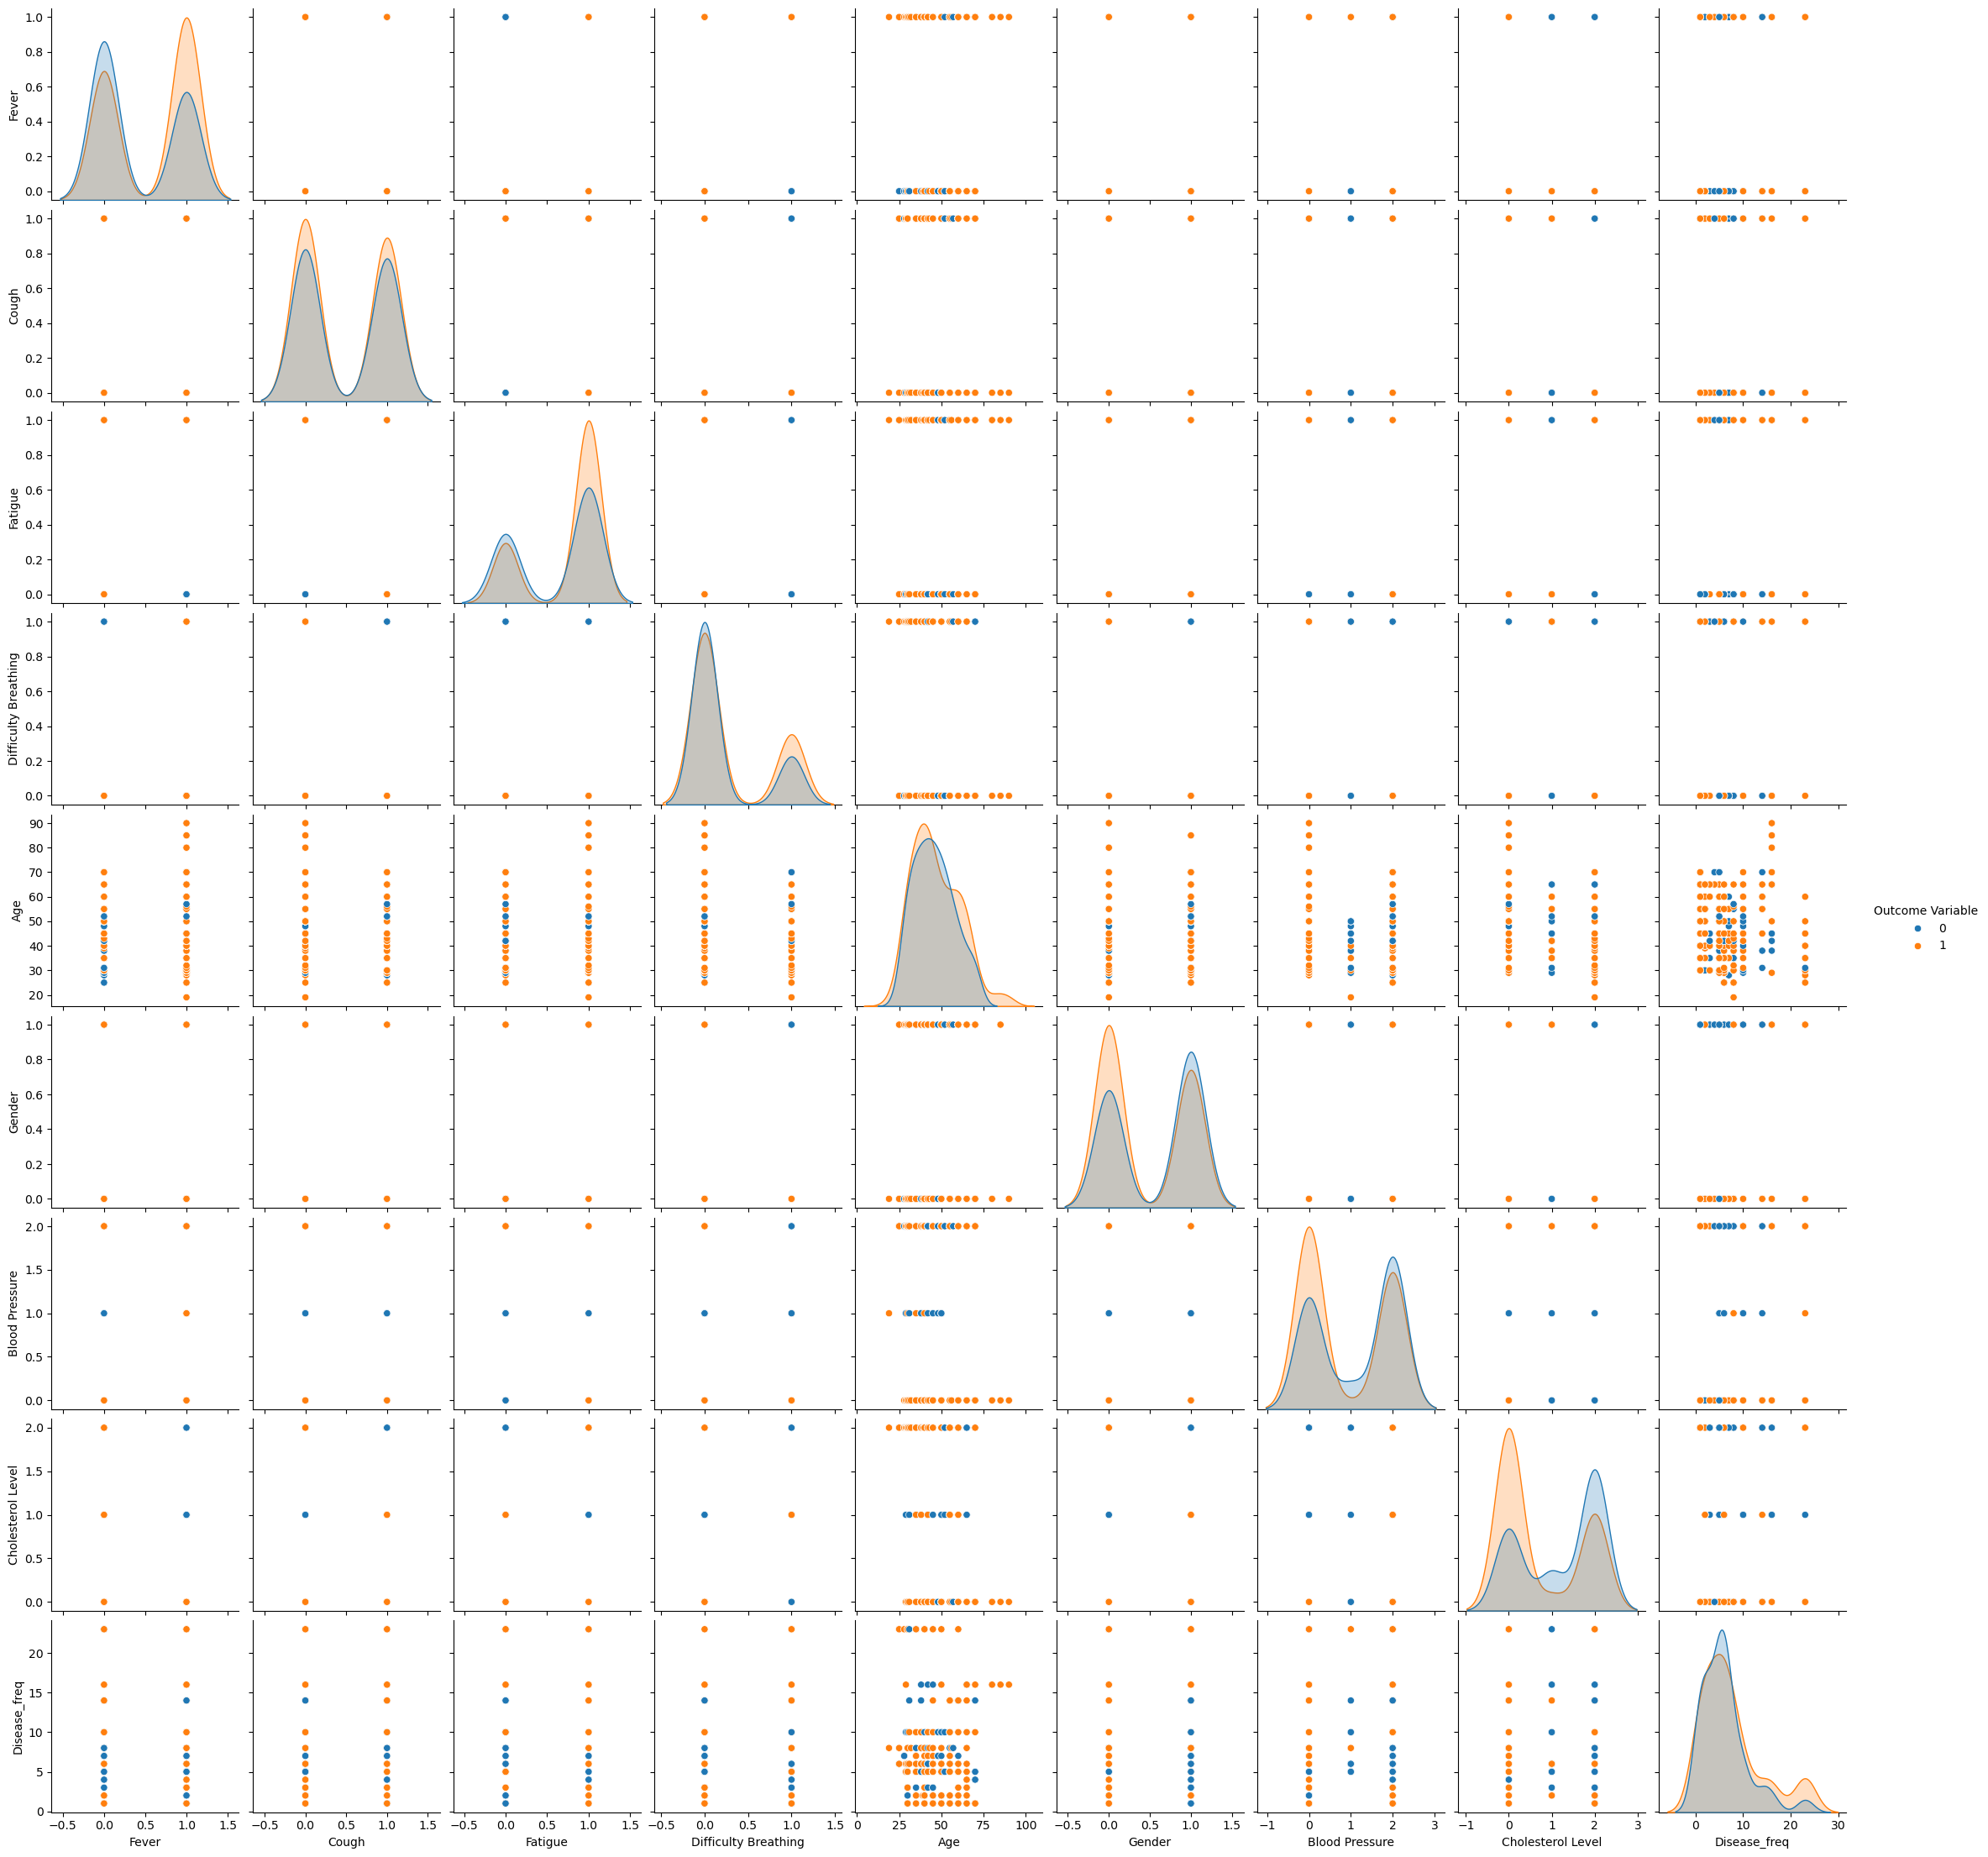

In [31]:
sns.pairplot(df,hue='Outcome Variable')
plt.show()

Text(0.5, 1.0, 'Gender vs Outcome Variable')

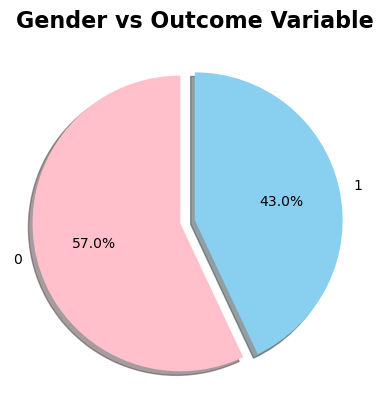

In [32]:
charges_by_Gender = df.groupby('Gender')['Outcome Variable'].sum()
explode = [0.1, 0]
colors = ['pink', '#89cff0']
plt.pie(charges_by_Gender, labels=charges_by_Gender.index, autopct='%1.1f%%',colors=colors,explode=explode, shadow=True, startangle=90)
plt.title('Gender vs Outcome Variable',fontsize=16, fontweight='bold')
#0 - Female 1-Male

Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

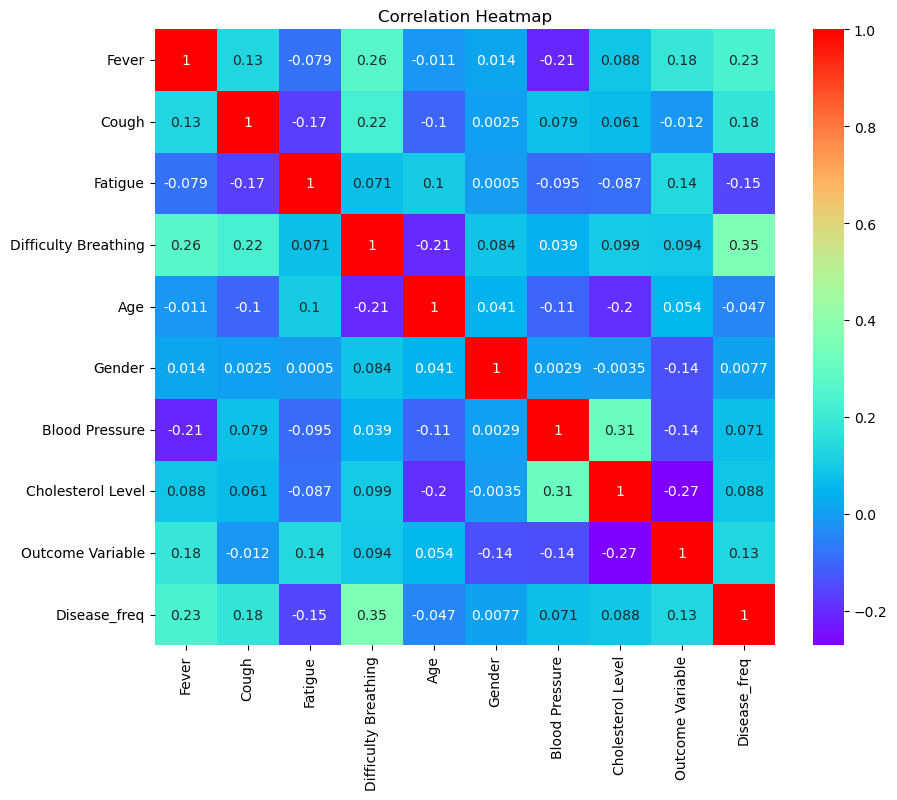

In [34]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')

**Train & Test Split**

In [36]:
X = df.drop(columns='Outcome Variable',axis=1)
X

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease_freq
0,1,0,1,1,19,0,1,2,8
1,0,1,1,0,25,0,2,2,6
2,0,1,1,0,25,0,2,2,6
3,1,1,0,1,25,1,2,2,23
4,1,1,0,1,25,1,2,2,23
...,...,...,...,...,...,...,...,...,...
344,1,0,1,0,80,0,0,0,16
345,1,0,1,0,85,1,0,0,16
346,1,0,1,0,85,1,0,0,16
347,1,0,1,0,90,0,0,0,16


In [37]:
y = df[['Outcome Variable']]
y

,Outcome Variable
0,1
1,0
2,0
3,1
4,1
...,...
344,1
345,1
346,1
347,1


In [38]:
X.ndim

2

In [39]:
y.ndim

2

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
y_train_1d = np.ravel(y_train)

In [43]:
y_train_1d.ndim

1

**RandomForest & Bayesian**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV

# defining parameter range 
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
] 

logModel = LogisticRegression()
  
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1) 
  
# fitting the model for grid search 
best_clf = clf.fit(X_train,y_train_1d)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


In [46]:
# print best parameter after tuning 

print(best_clf.best_params_)
  
# print how our model looks after hyper-parameter tuning 
print(best_clf.best_estimator_) 

{'C': 4.281332398719396, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
LogisticRegression(C=4.281332398719396, solver='saga')


In [47]:
grid_predictions = best_clf.predict(X_test)
  
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.53      0.63      0.58        30
           1       0.68      0.57      0.62        40

    accuracy                           0.60        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.61      0.60      0.60        70

